In [1]:
import numpy as np

data=np.load('data-AE.npy')
target=np.load('target-AE.npy')

In [2]:
train_data=data[:2500]
train_target=target[:2500]

test_data=data[2500:]
test_target=target[2500:]

print(train_data.shape)
print(test_data.shape)
print(train_target.shape)
print(test_target.shape)

(2500, 10, 1)
(719, 10, 1)
(2500, 10, 1)
(719, 10, 1)


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model=Sequential()

model.add(LSTM(units=96,return_sequences=True,input_shape=(10,1)))
model.add(Dropout(0.2))

model.add(LSTM(units=56,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=56,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=96,return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(10,activation='linear'))

model.compile(loss='mse',optimizer='adam')

c:\Users\USER\Music\DeepL\myenvdeep\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [4]:
history=model.fit(train_data,train_target,epochs=50, validation_split=0.2)

Epoch 1/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 51ms/step - loss: 0.0226 - val_loss: 0.0043
Epoch 2/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0020 - val_loss: 4.6954e-04
Epoch 3/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0015 - val_loss: 5.5702e-04
Epoch 4/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0014 - val_loss: 4.7465e-04
Epoch 5/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0013 - val_loss: 2.2888e-04
Epoch 6/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0012 - val_loss: 3.3874e-04
Epoch 7/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0011 - val_loss: 2.2273e-04
Epoch 8/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0010 - val_loss: 4.4905e-04
Epoch 9/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 8.9918e-04 - val_loss: 2.2574e-04
Epoch 10/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 9.4933e-04 - val_loss: 2.5080e-04
Epoch 11/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 8.4720e-04 - val_loss: 2.9512e-04
Epoch 12/5

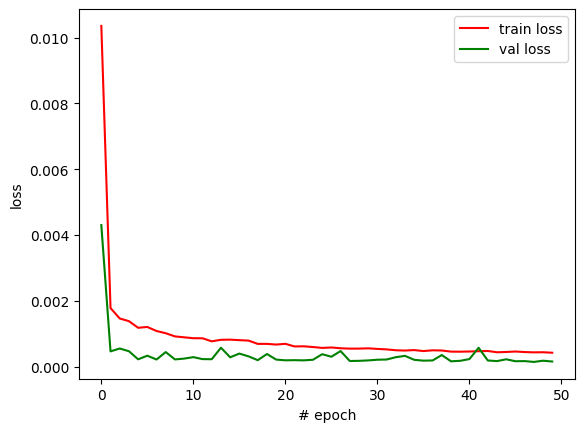

In [6]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'],'r',label='train loss')
plt.plot(history.history['val_loss'],'g',label='val loss')
plt.xlabel('# epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [14]:
"""
import numpy as np
import matplotlib.pyplot as plt

# Get the first 10-day sequence from the test data
first_10_days_test_data = test_data[0]

# Reshape if necessary (depending on your model input shape)
# Example: if model input shape is (batch_size, time_steps, features)
first_10_days_test_data = first_10_days_test_data.reshape((1, 10, -1))

# Make predictions
predictions = model.predict(first_10_days_test_data)

# Flatten predictions and the first 10 days of test data for plotting
predictions = predictions.flatten()
first_10_days_test_data = first_10_days_test_data.flatten()
test_target_0 = test_target[0].flatten()  # Assuming test_target[0] is the actual next 10 days

# Create x-values for plotting
x_values = np.arange(10)  # [0, 1, 2, ..., 9]

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(x_values, test_target_0, 'b', label='Actual')
plt.plot(x_values, predictions, 'g', label='Predicted', linestyle='dashed')
plt.title('First 10 Days of Test Data and Predictions')
plt.xlabel('Days')
plt.ylabel('Value')
plt.legend()
plt.show()

"""


"\nimport numpy as np\nimport matplotlib.pyplot as plt\n\n# Get the first 10-day sequence from the test data\nfirst_10_days_test_data = test_data[0]\n\n# Reshape if necessary (depending on your model input shape)\n# Example: if model input shape is (batch_size, time_steps, features)\nfirst_10_days_test_data = first_10_days_test_data.reshape((1, 10, -1))\n\n# Make predictions\npredictions = model.predict(first_10_days_test_data)\n\n# Flatten predictions and the first 10 days of test data for plotting\npredictions = predictions.flatten()\nfirst_10_days_test_data = first_10_days_test_data.flatten()\ntest_target_0 = test_target[0].flatten()  # Assuming test_target[0] is the actual next 10 days\n\n# Create x-values for plotting\nx_values = np.arange(10)  # [0, 1, 2, ..., 9]\n\n# Plot the results\nplt.figure(figsize=(12, 6))\nplt.plot(x_values, test_target_0, 'b', label='Actual')\nplt.plot(x_values, predictions, 'g', label='Predicted', linestyle='dashed')\nplt.title('First 10 Days of Test Da

In [20]:
result=model.predict(test_data)

test_data[0]


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


array([[0.121875  ],
       [0.12395833],
       [0.11041667],
       [0.11979167],
       [0.11458333],
       [0.125     ],
       [0.125     ],
       [0.11041667],
       [0.11458333],
       [0.11458333]])

In [21]:
result[0]

array([0.11446769, 0.11542622, 0.11436269, 0.11533801, 0.11902589,
       0.11548197, 0.11696044, 0.11873002, 0.11691462, 0.11689331],
      dtype=float32)

In [23]:
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Assuming model.predict(test_data) gives you `result`
result = model.predict(test_data)

# Ensure `result` and `test_target` are aligned in shape
# Flatten `result` to match the shape of `test_target`
result_flat = result.flatten()

# Assuming `test_target` is already in the shape (719, 10, 1),
# flatten it to match `result_flat`
test_target_flat = test_target.reshape(-1)

# Calculate R2 score
r2 = r2_score(test_target_flat, result_flat)
print('R2 score:', r2)

# Calculate Mean Squared Error
mse = mean_squared_error(test_target_flat, result_flat)
print('Mean Squared Error:', mse)

# Calculate Mean Absolute Error
mae = mean_absolute_error(test_target_flat, result_flat)
print('Mean Absolute Error:', mae)

# Define a threshold for accuracy (e.g., within 5% of the actual value)
threshold = 0.05

# Calculate the number of accurate predictions
accurate_predictions = np.abs((result_flat - test_target_flat) / test_target_flat) < threshold

# Calculate accuracy as the percentage of accurate predictions
accuracy = np.mean(accurate_predictions)
print('Accuracy:', accuracy)



23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
R2 score: 0.8866879942648084
Mean Squared Error: 0.0030215826251194155
Mean Absolute Error: 0.027649621654217253
Accuracy: 0.4191933240611961


C:\Users\USER\AppData\Local\Temp\ipykernel_23432\261938284.py:31: RuntimeWarning: divide by zero encountered in divide
  accurate_predictions = np.abs((result_flat - test_target_flat) / test_target_flat) < threshold


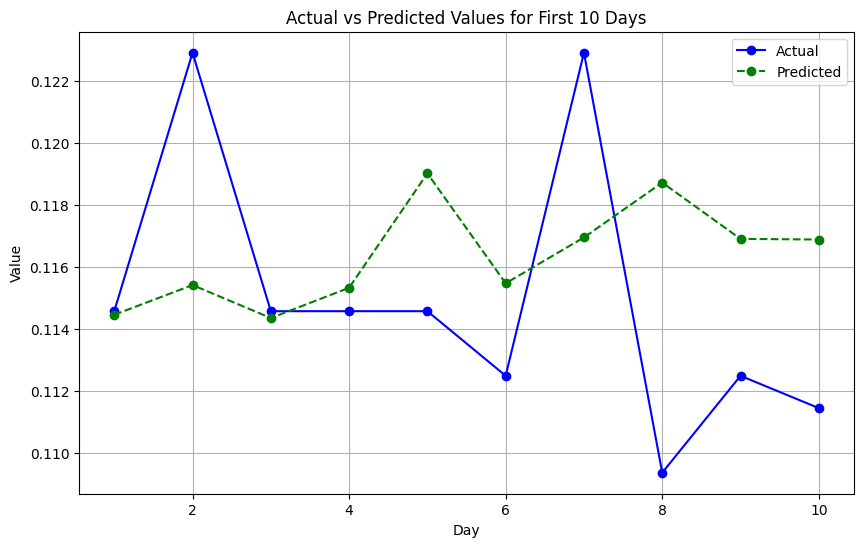

In [28]:
import matplotlib.pyplot as plt

# Assuming test_data is your input data and result is your predicted output
# Extract the first sequence of 10 days from test_data
first_sequence_test_data = test_data[0]
first_sequence_test_target = test_target[0]

# Extract the corresponding predicted values from result
predicted_values = result[0]

# Create x values for plotting (days)
days = range(1, 11)  # assuming each day is from 1 to 10

# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(days, first_sequence_test_target, marker='o', linestyle='-', color='b', label='Actual')
plt.plot(days, predicted_values, marker='o', linestyle='--', color='g', label='Predicted')
plt.title('Actual vs Predicted Values for First 10 Days')
plt.xlabel('Day')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


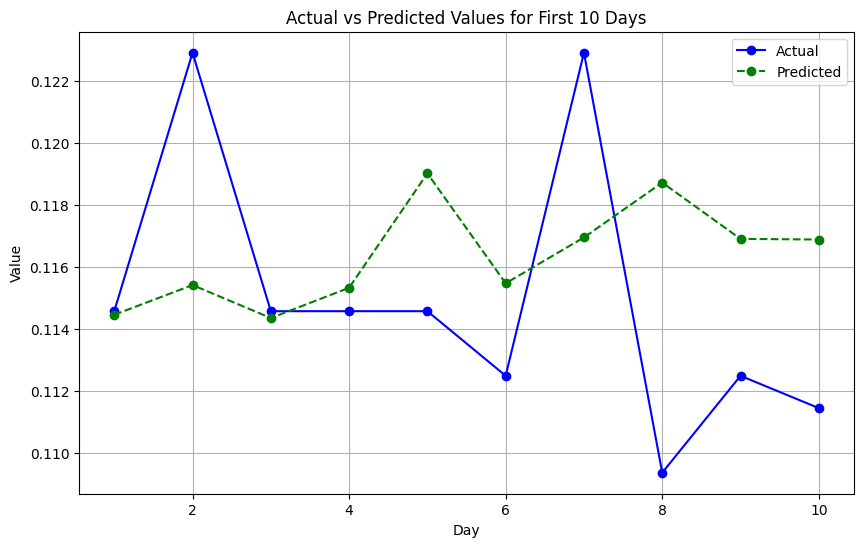

In [31]:
import matplotlib.pyplot as plt

# Extract the actual values for the first 10 days from test_target
actual_values = test_target[0]

# Extract the predicted values for the first 10 days from result
predicted_values = result[0]

# Create x values for plotting (days)
days = range(1, 11)  # assuming each day is from 1 to 10

# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(days, actual_values, marker='o', linestyle='-', color='b', label='Actual')
plt.plot(days, predicted_values, marker='o', linestyle='--', color='g', label='Predicted')
plt.title('Actual vs Predicted Values for First 10 Days')
plt.xlabel('Day')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


In [34]:
from sklearn.metrics import r2_score

best_row_index = -1
best_r2_score = 0

# Iterate through each row in test_data
for i in range(len(test_data)):
    # Get the actual values for this row
    actual_values = test_target[i]  # Flatten or reshape as needed
    
    # Get the predicted values for this row
    predicted_values = result[i]
    
    # Calculate R2 score for this row
    r2 = r2_score(actual_values, predicted_values)
    
    # Update best row index and R2 score if this row has a higher score
    if r2 > best_r2_score:
        best_r2_score = r2
        best_row_index = i

# Print the index and R2 score of the best row
print(f"The row with the highest R2 score is row {best_row_index}, with R2 score = {best_r2_score:.4f}")


The row with the highest R2 score is row 101, with R2 score = 0.3696


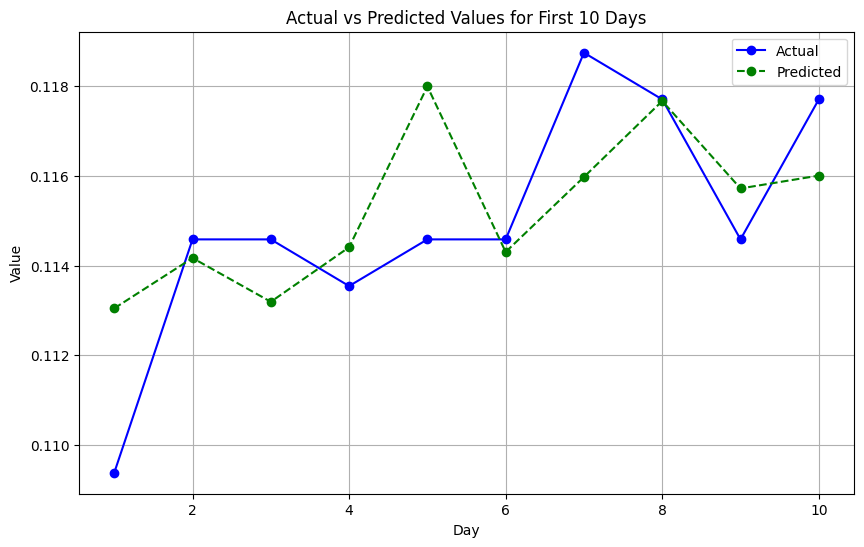

In [35]:
import matplotlib.pyplot as plt

# Assuming test_data is your input data and result is your predicted output
# Extract the first sequence of 10 days from test_data
first_sequence_test_data = test_data[101]
first_sequence_test_target = test_target[101]

# Extract the corresponding predicted values from result
predicted_values = result[101]

# Create x values for plotting (days)
days = range(1, 11)  # assuming each day is from 1 to 10

# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(days, first_sequence_test_target, marker='o', linestyle='-', color='b', label='Actual')
plt.plot(days, predicted_values, marker='o', linestyle='--', color='g', label='Predicted')
plt.title('Actual vs Predicted Values for First 10 Days')
plt.xlabel('Day')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


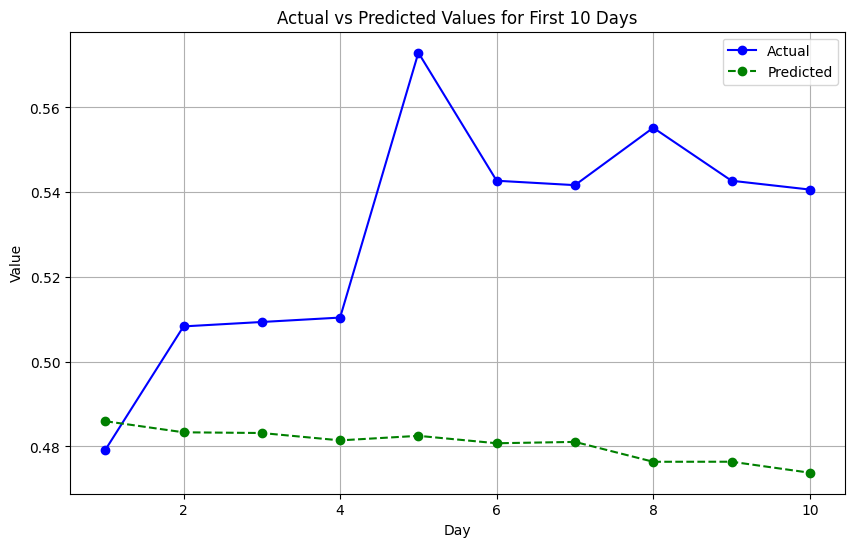

In [40]:
import matplotlib.pyplot as plt

# Assuming test_data is your input data and result is your predicted output
# Extract the first sequence of 10 days from test_data
first_sequence_test_data = test_data[681]
first_sequence_test_target = test_target[681]

# Extract the corresponding predicted values from result
predicted_values = result[681]

# Create x values for plotting (days)
days = range(1, 11)  # assuming each day is from 1 to 10

# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(days, first_sequence_test_target, marker='o', linestyle='-', color='b', label='Actual')
plt.plot(days, predicted_values, marker='o', linestyle='--', color='g', label='Predicted')
plt.title('Actual vs Predicted Values for First 10 Days')
plt.xlabel('Day')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()
